<a href="https://colab.research.google.com/github/kilianBertholon/Apprentissage-profond/blob/main/Partie2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Rendu Projet Apprentissage Profond </center>

In [1]:
!git clone https://github.com/kilianBertholon/Apprentissage-profond.git

Cloning into 'Apprentissage-profond'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 41 (delta 2), reused 8 (delta 1), pack-reused 32
Receiving objects: 100% (41/41), 105.92 MiB | 31.98 MiB/s, done.
Resolving deltas: 100% (24/24), done.
Updating files: 100% (29/29), done.


Kilian Bertholon  
Guillaume Cobat  
Placé Anthony

In [5]:
import csv
import os
import json
import numpy as np

def load_data(nom_dossier="."):
    """
    Fonction de chargement des données
    Attention : Utilise les librairies csv et json. S'assurer que le répertoire de travail est celui où se trouve
    la fonction data_loading.py (sans déplacer les différents fichiers)
    """

    info_obs = {}
    users = []

    print("-- chargement des fichiers csv (observations + labels) --")
    dataset = []
    user_ids = []
    labels = []
    for dir_files in os.listdir(nom_dossier):
        if os.path.isfile(nom_dossier + "/" + dir_files) and dir_files[-3:]=='csv':
            user_id = dir_files.split('_')[0]
            print("Data ", user_id)
            users.append(user_id)
            cur_series = []
            cur_labels = []
            with open(nom_dossier + "/" + dir_files, newline='') as csvfile:
                spamreader = csv.reader(csvfile, delimiter=',', quotechar='\'')
                for i,row in enumerate(spamreader):
                    if i==0:
                        info_obs['observations'] = row[2:5]
                        info_obs['labels'] = row[7]
                    else:
                        cur_series.append([float(v) for v in row[2:5]])
                        cur_labels.append(row[7])
            segmented_series = []
            segmented_labels = []
            cur_lab = "not_labeled"
            cur_ser = []
            for i, (v, l) in enumerate(zip(cur_series, cur_labels)):
                if l != cur_lab:
                    if cur_lab != "not_labeled":
                        segmented_series.append(np.array(cur_ser))
                        segmented_labels.append(cur_lab)
                    cur_ser = []
                    cur_lab = l
                if l != "not_labeled":
                    cur_ser.append(v)
        dataset.extend(segmented_series)
        labels.extend(segmented_labels)
        user_ids.extend([user_id] * len(segmented_series))


    print("-- chargement du fichier json (meta données) --")
    # Opening JSON file
    f = open(os.path.join(nom_dossier, 'meta.json'))
    # returns JSON object as a dictionary
    tmp_meta_data = json.load(f)
    meta_data = {}
    for origin in tmp_meta_data:
        for user_id, user_info in tmp_meta_data[origin].items():
            meta_data[user_id] = user_info
            meta_data[user_id]['origin'] = origin
    # Closing file
    f.close()

    return dataset, labels, user_ids  # info_obs, meta_data

print("Lecture des données")
data_obs, data_labels, user_ids = load_data("Apprentissage-profond/hangtime_har/")
print("Données chargées")

print(data_obs[:5])
print(data_labels[:5])
print(user_ids[:5])

Lecture des données
-- chargement des fichiers csv (observations + labels) --
Data  ac59
Data  f2ad
Data  e90f
Data  ac59
Data  9bd4
Data  0846
Data  ce9d
Data  2dd9
Data  0846
Data  9bd4
Data  2dd9
Data  05d8
Data  10f0
Data  4d70
Data  c6f3
Data  b512
Data  a0da
Data  10f0
Data  f2ad
Data  4991
Data  ce9d
Data  a0da
Data  4d70
Data  b512
-- chargement du fichier json (meta données) --
Données chargées
[array([[ 1.616200e-01,  6.545400e-01,  2.271000e-02],
       [ 1.172000e-02,  2.370600e-01,  8.936000e-02],
       [-2.246000e-02,  1.894500e-01,  9.497000e-02],
       [ 1.950000e-03,  1.044900e-01,  4.224000e-02],
       [ 3.589000e-02,  1.103500e-01, -1.001000e-02],
       [-2.588000e-02, -4.880000e-03,  8.667000e-02],
       [-1.149900e-01,  1.685000e-02,  1.152300e-01],
       [-7.764000e-02, -3.660000e-03,  7.446000e-02],
       [-8.301000e-02, -4.370000e-02,  6.689000e-02],
       [-9.717000e-02,  2.541500e-01, -2.319000e-02],
       [-6.840000e-03,  5.556600e-01, -1.672400e-01]

## Création d'un jeu de données de test et d'un jeu d'entrainement

Dans un premier temps, on va se charger de séparer nos données en un jeu d'entrainement et un jeu de test. Pour ce faire, on va séparer chacun des tests de chacun des individus en gardant 80 % des tests de chacun des individus comme des données d'entrainements et 20 % restants comme des données de test

In [6]:
from sklearn.model_selection import train_test_split

unique_users = list(set(user_ids))

data_obs_train = []
data_obs_test = []
data_labels_train = []
data_labels_test = []
user_ids_train = []
user_ids_test = []

#Pour chaque utilisateur, on sépare les données en train et test
for user in unique_users:
    #Extraire les indices correspondant à l'utilisateur
    indices_user = [i for i, u_id in enumerate(user_ids) if u_id == user]

    #Diviser les indices en train et test
    indices_train, indices_test = train_test_split(indices_user, test_size=0.2, random_state=42)

    #Ajouter les données d'entrainements
    data_obs_train.extend([data_obs[i] for i in indices_train])
    data_labels_train.extend([data_labels[i] for i in indices_train])
    user_ids_train.extend([user_ids[i] for i in indices_train])

    #Ajouter les données de test
    data_obs_test.extend([data_obs[i] for i in indices_test])
    data_labels_test.extend([data_labels[i] for i in indices_test])
    user_ids_test.extend([user_ids[i] for i in indices_test])

#Vérifier que les données sont bien séparées
print("Taille de l'ensemble d'entraînement :", len(data_obs_train))
print("Taille de l'ensemble de test :", len(data_obs_test))

Taille de l'ensemble d'entraînement : 9329
Taille de l'ensemble de test : 2340


Analyse du nombre de classes de y dans le jeu de test et dans le jeu d'apprentissage :

In [7]:
print('Il y a ', len(np.unique(data_labels_train)), ' classes dans les données d\'entraînement')
print('Il y a ', len(np.unique(data_labels_test)), ' classes dans les données de test')
print('Il y a ', len(np.unique(data_labels)), ' classes dans les données totales')

print('dif label en entrainement : ', np.unique(data_labels_train))
print('dif label en test : ',np.unique(data_labels_test))
print('dif label au total : ',np.unique(data_labels))

Il y a  5  classes dans les données d'entraînement
Il y a  5  classes dans les données de test
Il y a  5  classes dans les données totales
dif label en entrainement :  ['jumping' 'running' 'sitting' 'standing' 'walking']
dif label en test :  ['jumping' 'running' 'sitting' 'standing' 'walking']
dif label au total :  ['jumping' 'running' 'sitting' 'standing' 'walking']


Les labels sont bien les mêmes dans les jeux d'entrainements et de tests et correspondent bien à ceux du jeu de base

## Normalisation des données

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_obs_train_Norm = [scaler.fit_transform(obs) for obs in data_obs_train]
data_obs_test_Norm = [scaler.fit_transform(obs) for obs in data_obs_test]

## Longueur de chaque série temporelle

Dans notre cas, il serait préférables d'avoir des séquences de tailles identiques ( plus simple pour la convergence des informations)  
On va donc chercher à rajouter du padding (séries de 0 pour complémenter le manque d elongueur sur certaines séquences) ou a réaliser du troncage (garder uniquement la partie la plus importante de chaque série pour obtenir des informations de même taille)

In [9]:
num_sequences = len(data_obs_train_Norm)

# Afficher la longueur de chaque séquence
for i in range(min(5,num_sequences)):
    print(f"Longueur de la séquence {i + 1}: {len(data_obs_train[i])}")

Longueur de la séquence 1: 66
Longueur de la séquence 2: 27
Longueur de la séquence 3: 31
Longueur de la séquence 4: 314
Longueur de la séquence 5: 273


#### Jeu de données d'entrainement

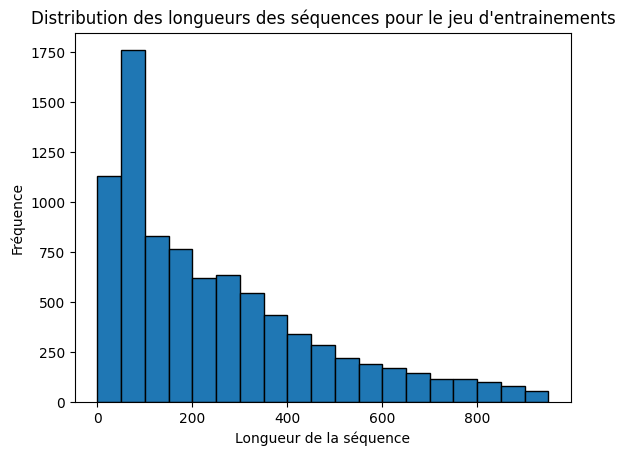

Longueur minimale : 1
Longueur maximale : 46004
Longueur moyenne : 472.4638224890127


In [10]:
import matplotlib.pyplot as plt

# Calculer la longueur de chaque séquence
sequence_lengths = [len(seq) for seq in data_obs_train]

bins = np.arange(0, 1000, 50)
# Afficher un histogramme
plt.hist(sequence_lengths, bins=bins, edgecolor='black')
plt.title('Distribution des longueurs des séquences pour le jeu d\'entrainements')
plt.xlabel('Longueur de la séquence')
plt.ylabel('Fréquence')
plt.show()

min_length = min(sequence_lengths)
max_length = max(sequence_lengths)
mean_length = np.mean(sequence_lengths)

print(f"Longueur minimale : {min_length}")
print(f"Longueur maximale : {max_length}")
print(f"Longueur moyenne : {mean_length}")

#### Jeu de données de test

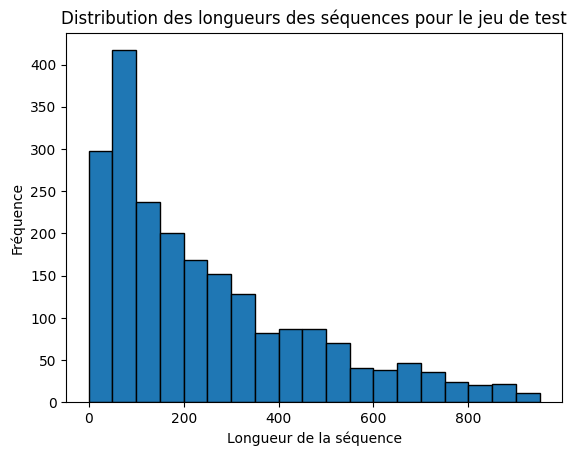

Longueur minimale : 11
Longueur maximale : 13780
Longueur moyenne : 451.2401709401709


In [11]:
import matplotlib.pyplot as plt

# Calculer la longueur de chaque séquence
sequence_lengths = [len(seq) for seq in data_obs_test]

bins = np.arange(0, 1000, 50)
# Afficher un histogramme
plt.hist(sequence_lengths, bins=bins, edgecolor='black')
plt.title('Distribution des longueurs des séquences pour le jeu de test')
plt.xlabel('Longueur de la séquence')
plt.ylabel('Fréquence')
plt.show()

min_length = min(sequence_lengths)
max_length = max(sequence_lengths)
mean_length = np.mean(sequence_lengths)

print(f"Longueur minimale : {min_length}")
print(f"Longueur maximale : {max_length}")
print(f"Longueur moyenne : {mean_length}")

Pour être sur de ne pas se tromper on va créer les deux manières et on comparera pour chacun des test les deux manières de faire

## Padding

Test avec padding = 1000 (au dessus très peu d'actions sont plus longue et cela accentue nettemment le temps de traitement)

In [12]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

data_obs_train_Norm_pad = []
max_sequences_length = max(len(seq) for seq in data_obs_train_Norm)
data_obs_train_Norm_pad = pad_sequences(data_obs_train_Norm, maxlen=1000, padding='post', dtype='float32')

data_obs_test_Norm_pad = []
max_sequences_length_test = max(len(seq) for seq in data_obs_test_Norm)
data_obs_test_Norm_pad = pad_sequences(data_obs_test_Norm, maxlen=1000, padding='post', dtype='float32')


## Encodage des labels

In [13]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#Encoder les labels en entiers
labels_encoder = LabelEncoder()
labels_train_int = labels_encoder.fit_transform(data_labels_train)
labels_test_int = labels_encoder.fit_transform(data_labels_test)

#Encoder les labels en one-hot
labels_onehot = OneHotEncoder(sparse=False, categories='auto')
labels_train_onehot = labels_onehot.fit_transform(labels_train_int.reshape(-1, 1))
labels_test_onehot = labels_onehot.fit_transform(labels_test_int.reshape(-1, 1))

print(labels_train_onehot.shape)

(9329, 5)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Modèle à tester et comparer

##### Avec Padding  
  
1. RNN
2. CNN
3. CNN 1D

##### Sans Padding  
  
1. CNN avec GAP  
2. Réseau de neurones Transformer  
3. Réseaux de neurones Attention  
4. Réseaux de neurones Hybrides  


### Réseau RNN

In [28]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import SimpleRNN, Dense, Flatten, Input
from keras.callbacks import EarlyStopping

cb = EarlyStopping(monitor='val_loss',patience=5, min_delta=0.01, restore_best_weights=True, verbose=2)


def model_rnn_basique(T, D, nb_classes):
  input = Input(shape = (T, D))
  Couche_rec = SimpleRNN(64)(input)
  dense1 = Dense(nb_classes, activation = "sigmoid")(Couche_rec)
  model = Model(inputs=input, outputs=dense1)
  model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics=["accuracy"])
  model.summary()
  return model


In [29]:
model_rnn = model_rnn_basique(1000, 3, 5)

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1000, 3)]         0         
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 64)                4352      
                                                                 
 dense_5 (Dense)             (None, 5)                 325       
                                                                 
Total params: 4677 (18.27 KB)
Trainable params: 4677 (18.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
history_rnn = model_rnn.fit(data_obs_train_Norm_pad, labels_train_onehot, epochs=10, batch_size=32, validation_data=(data_obs_test_Norm_pad, labels_test_onehot),  callbacks=[cb])

Epoch 1/10
292/292 [==============================] - 30s 101ms/step - loss: 1.3093 - accuracy: 0.3645 - val_loss: 1.2833 - val_accuracy: 0.3846
Epoch 2/10
292/292 [==============================] - 30s 104ms/step - loss: 1.2706 - accuracy: 0.3755 - val_loss: 1.2769 - val_accuracy: 0.3850
Epoch 3/10
292/292 [==============================] - 30s 102ms/step - loss: 1.2673 - accuracy: 0.3702 - val_loss: 1.2759 - val_accuracy: 0.3850
Epoch 4/10
292/292 [==============================] - 29s 100ms/step - loss: 1.2660 - accuracy: 0.3754 - val_loss: 1.2721 - val_accuracy: 0.3850
Epoch 5/10
292/292 [==============================] - 31s 105ms/step - loss: 1.2675 - accuracy: 0.3746 - val_loss: 1.2753 - val_accuracy: 0.3397
Epoch 6/10
292/292 [==============================] - 30s 103ms/step - loss: 1.2641 - accuracy: 0.3795 - val_loss: 1.2693 - val_accuracy: 0.3850
Epoch 7/10
292/292 [==============================] - 29s 100ms/step - loss: 1.2655 - accuracy: 0.3735 - val_loss: 1.2693 - val_ac

### Réseau RNN avancé

In [42]:
def model_rnn_avance(T, D, nb_classes):
  input = Input(shape = (T, D))
  Couche_rec = SimpleRNN(64, return_sequences=True)(input)
  Couche_rec2 = SimpleRNN(32)(Couche_rec)
  dense1 = Dense(nb_classes, activation = "sigmoid")(Couche_rec2)
  model = Model(inputs=input, outputs=dense1)
  model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics=["accuracy"])
  model.summary()
  return model



In [43]:
model_rnn_avance = model_rnn_avance(1000, 3, 5)
history_rnn_avance = model_rnn_avance.fit(data_obs_train_Norm_pad, labels_train_onehot, epochs=10, batch_size=100, validation_data=(data_obs_test_Norm_pad, labels_test_onehot),  callbacks=[cb])

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1000, 3)]         0         
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 1000, 64)          4352      
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 32)                3104      
                                                                 
 dense_6 (Dense)             (None, 5)                 165       
                                                                 
Total params: 7621 (29.77 KB)
Trainable params: 7621 (29.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
94/94 [==============================] - 31s 319ms/step - loss: 1.3121 - accuracy: 0.3605 - val_loss: 1.2706 - val_accuracy: 0.3850
Epoch 2/10
94/

### Modèle LTSM

In [50]:
# Definition du modèle
from tensorflow.keras.layers import Input, Dense, SimpleRNN, LSTM, Flatten
def model_lstm(T, D, nb_classes):
  input = Input(shape = (T, D))
  Couche_rec = LSTM(64, return_sequences=True)(input)
  Couche_rec2 = LSTM(32)(Couche_rec)
  dense1 = Dense(nb_classes, activation = "sigmoid")(Couche_rec2)
  model = Model(inputs=input, outputs=dense1)
  model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics=["accuracy"])
  model.summary()
  return model

In [51]:
model_lstm = model_lstm(1000, 3, 5)
history_lstm = model_lstm.fit(data_obs_train_Norm_pad, labels_train_onehot, epochs=10, batch_size=100, validation_data=(data_obs_test_Norm_pad, labels_test_onehot),  callbacks=[cb])

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 1000, 3)]         0         
                                                                 
 lstm (LSTM)                 (None, 1000, 64)          17408     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense_7 (Dense)             (None, 5)                 165       
                                                                 
Total params: 29989 (117.14 KB)
Trainable params: 29989 (117.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
94/94 [==============================] - 116s 1s/step - loss: 1.3480 - accuracy: 0.3722 - val_loss: 1.3055 - val_accuracy: 0.3556
Epoch 2/10
9

## Graphique de comparaison

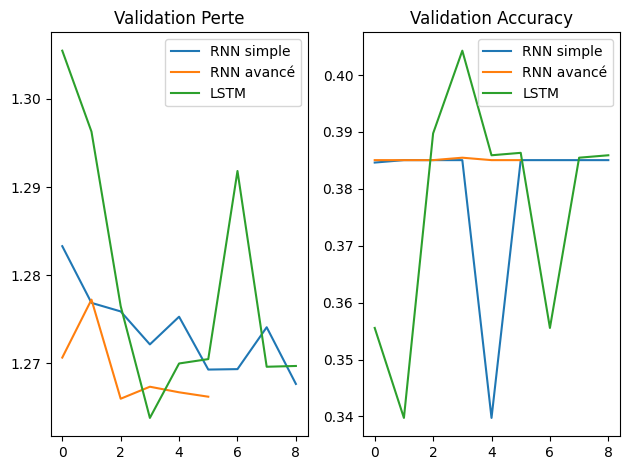

In [52]:
# Visualiser l'évolution de la perte et de la précision au fil des époques
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.plot(history_rnn.history['val_loss'], label='RNN simple')
plt.plot(history_rnn_avance.history['val_loss'], label='RNN avancé')
plt.plot(history_lstm.history['val_loss'], label='LSTM')
plt.title('Validation Perte')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_rnn.history['val_accuracy'], label='RNN simple')
plt.plot(history_rnn_avance.history['val_accuracy'], label='RNN avancé')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM')
plt.title('Validation Accuracy')
plt.legend()

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()